"""
Back in 2019, I was talking to my girlfriend, who is a professional musician, about how a publishing platform or a record label  are very important to an artist's career.
During the conversation she mentioned that some recent artists even seem to come out of nowhere and use the label and collaborations to build a previously non-existent career
(Looking at you Maluma).

The conversation moved on to artists that post videos on youtube that get billions of views, likes and comments. She said VEVO is a huge platform for them, so I tried to find a youtube channel/video dataset to play around with. I came across https://www.kaggle.com/kabure/extensive-usa-youtube-eda/data where the user made an impresive job analizing video categories. 

This analysis will be focusing on USA VEVO data, let's check out which insights we can get!
"""

In [197]:
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot

In [198]:
# Import dataset into pandas dataframe
df =  pd.read_csv('USvideos.csv')

In [199]:
# Check available columns
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [200]:
# Keep only relevant columns
df = df[['trending_date', 
         'title', 
         'channel_title', 
         'publish_time', 
         'views', 
         'likes', 
         'dislikes', 
         'comment_count']]

In [201]:
# Check for duplicated rows based on title and channel_title
dupes = df[df.duplicated(subset=['title','channel_title']) == True]
dupes.shape

(34481, 8)

In [202]:
# 34481 duplicates, check which ones to keep:
dupes = dupes.sort_values('views', ascending=False)
dupes.head(10)

,trending_date,title,channel_title,publish_time,views,likes,dislikes,comment_count
38547,18.02.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,2018-05-06T04:00:07.000Z,225211923,5023450,343541,517232
38345,18.01.06,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,2018-05-06T04:00:07.000Z,220490543,4962403,338105,512337
38146,18.31.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,2018-05-06T04:00:07.000Z,217750076,4934188,335462,509799
37935,18.30.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,2018-05-06T04:00:07.000Z,210338856,4836448,326902,501722
37730,18.29.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,2018-05-06T04:00:07.000Z,205643016,4776680,321493,496211
37531,18.28.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,2018-05-06T04:00:07.000Z,200820941,4714942,316129,491005
37333,18.27.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,2018-05-06T04:00:07.000Z,196222618,4656929,311042,485797
37123,18.26.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,2018-05-06T04:00:07.000Z,190950401,4594931,305435,479917
36913,18.25.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,2018-05-06T04:00:07.000Z,184446490,4512326,298157,473039
36710,18.24.05,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,2018-05-06T04:00:07.000Z,179045286,4437175,291098,466470


In [203]:
# Sort by view count, drop duplicates but keep the highest!
df = df.sort_values('views').drop_duplicates(subset=['title','channel_title'], keep='last')
df


,trending_date,title,channel_title,publish_time,views,likes,dislikes,comment_count
14782,18.28.01,"1 dead, others injured after Ky. school shooting",Newsy,2018-01-23T15:30:01.000Z,559,9,0,4
777,17.17.11,Coach Taggart Monday Presser Ahead of Arizona,GoDucksdotcom,2017-11-13T20:41:45.000Z,704,10,2,5
14984,18.29.01,Artwork Forge,Palo Alto Online,2018-01-10T23:53:56.000Z,745,1,0,0
12716,18.18.01,"Raw: 3 South Carolina Deputies, 1 Officer Shot",Associated Press,2018-01-16T12:16:44.000Z,748,9,0,0
160,17.14.11,Huffy Metaloid Bicycle Commercial 1997,90s Commercials,2017-03-31T21:46:53.000Z,773,2,0,0
...,...,...,...,...,...,...,...,...
38273,18.01.06,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,2018-05-18T09:00:02.000Z,123010920,5613827,206892,1228655
34888,18.15.05,"Becky G, Natti Natasha - Sin Pijama (Official ...",BeckyGVEVO,2018-04-20T10:40:51.000Z,139334502,1425496,119798,83941
34708,18.14.05,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,2018-04-20T04:00:03.000Z,148689896,3094021,129502,242039
6181,17.14.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,149376127,3093544,1643059,810698


In [204]:
# Fix and normalize datetime columns
df['publish_date'] = df['publish_time'].str.split('T').str[0]
df['publish_hour'] = df['publish_time'].str.split('T').str[1].str.replace('.000Z','')

df['publish_date'] = pd.to_datetime(df['publish_date'])
df['publish_hour'] = pd.to_datetime(df['publish_hour'])
df['publish_hour'] = df['publish_hour'].dt.strftime('%H:%M')

df['trending_year'] = df['trending_date'].str.split('.').str[0]
df['trending_day'] = df['trending_date'].str.split('.').str[1]
df['trending_month'] = df['trending_date'].str.split('.').str[2]

df['trending_date'] = '20' + df['trending_year'] + '-' + df['trending_month'] + '-' + df['trending_day']
df['trending_date'] = pd.to_datetime(df['trending_date'])

df

,trending_date,title,channel_title,publish_time,views,likes,dislikes,comment_count,publish_date,publish_hour,trending_year,trending_day,trending_month
14782,2018-01-28,"1 dead, others injured after Ky. school shooting",Newsy,2018-01-23T15:30:01.000Z,559,9,0,4,2018-01-23,15:30,18,28,01
777,2017-11-17,Coach Taggart Monday Presser Ahead of Arizona,GoDucksdotcom,2017-11-13T20:41:45.000Z,704,10,2,5,2017-11-13,20:41,17,17,11
14984,2018-01-29,Artwork Forge,Palo Alto Online,2018-01-10T23:53:56.000Z,745,1,0,0,2018-01-10,23:53,18,29,01
12716,2018-01-18,"Raw: 3 South Carolina Deputies, 1 Officer Shot",Associated Press,2018-01-16T12:16:44.000Z,748,9,0,0,2018-01-16,12:16,18,18,01
160,2017-11-14,Huffy Metaloid Bicycle Commercial 1997,90s Commercials,2017-03-31T21:46:53.000Z,773,2,0,0,2017-03-31,21:46,17,14,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38273,2018-06-01,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,2018-05-18T09:00:02.000Z,123010920,5613827,206892,1228655,2018-05-18,09:00,18,01,06
34888,2018-05-15,"Becky G, Natti Natasha - Sin Pijama (Official ...",BeckyGVEVO,2018-04-20T10:40:51.000Z,139334502,1425496,119798,83941,2018-04-20,10:40,18,15,05
34708,2018-05-14,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,2018-04-20T04:00:03.000Z,148689896,3094021,129502,242039,2018-04-20,04:00,18,14,05
6181,2017-12-14,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06T17:58:51.000Z,149376127,3093544,1643059,810698,2017-12-06,17:58,17,14,12


In [205]:
# Reorder and drop unnecessary columns:
df = df[['channel_title','title','publish_hour','publish_date','trending_date','views', 'likes', 'dislikes','comment_count']]
df

,channel_title,title,publish_hour,publish_date,trending_date,views,likes,dislikes,comment_count
14782,Newsy,"1 dead, others injured after Ky. school shooting",15:30,2018-01-23,2018-01-28,559,9,0,4
777,GoDucksdotcom,Coach Taggart Monday Presser Ahead of Arizona,20:41,2017-11-13,2017-11-17,704,10,2,5
14984,Palo Alto Online,Artwork Forge,23:53,2018-01-10,2018-01-29,745,1,0,0
12716,Associated Press,"Raw: 3 South Carolina Deputies, 1 Officer Shot",12:16,2018-01-16,2018-01-18,748,9,0,0
160,90s Commercials,Huffy Metaloid Bicycle Commercial 1997,21:46,2017-03-31,2017-11-14,773,2,0,0
...,...,...,...,...,...,...,...,...,...
38273,ibighit,BTS (방탄소년단) 'FAKE LOVE' Official MV,09:00,2018-05-18,2018-06-01,123010920,5613827,206892,1228655
34888,BeckyGVEVO,"Becky G, Natti Natasha - Sin Pijama (Official ...",10:40,2018-04-20,2018-05-15,139334502,1425496,119798,83941
34708,ArianaGrandeVevo,Ariana Grande - No Tears Left To Cry,04:00,2018-04-20,2018-05-14,148689896,3094021,129502,242039
6181,YouTube Spotlight,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,17:58,2017-12-06,2017-12-14,149376127,3093544,1643059,810698


In [206]:
# Keep only VEVO related channels
vevo = df[df['channel_title'].str.contains('VEVO')]
vevo

,channel_title,title,publish_hour,publish_date,trending_date,views,likes,dislikes,comment_count
1359,GinWigmoreVEVO,Gin Wigmore - Cabrona,13:05,2017-11-16,2017-11-20,5839,427,14,28
1587,FRANKIEmusicVEVO,FRANKIE - Coping (Official Video),08:00,2017-11-17,2017-11-21,7840,253,17,36
7198,tovestyrkeVEVO,Tove Styrke - liability (demo) (Audio),08:00,2017-12-14,2017-12-19,11995,1403,12,107
12582,NoahKahanVEVO,"Noah Kahan, Julia Michaels - Hurt Somebody (Au...",05:05,2018-01-12,2018-01-17,12857,754,10,37
7189,JackJohnsonVEVO,Jack Johnson - Only The Ocean,05:00,2017-12-14,2017-12-19,13135,1398,9,106
...,...,...,...,...,...,...,...,...,...
25947,MalumaVEVO,Maluma - El Préstamo (Official Video),11:00,2018-03-09,2018-03-25,87264467,815369,71494,35945
2587,LuisFonsiVEVO,"Luis Fonsi, Demi Lovato - Échame La Culpa",05:00,2017-11-17,2017-11-26,102012605,2376636,117196,134224
34747,TheWeekndVEVO,The Weeknd - Call Out My Name (Official Video),16:00,2018-04-12,2018-05-14,122544931,1427436,40837,55320
34888,BeckyGVEVO,"Becky G, Natti Natasha - Sin Pijama (Official ...",10:40,2018-04-20,2018-05-15,139334502,1425496,119798,83941


In [207]:
# How many days does it take for a VEVO video to start "trending"?


print((vevo['trending_date'] - vevo['publish_date']).median())


7 days 00:00:00


Text(0.5, 0, 'Days to Trend for VEVO videos')

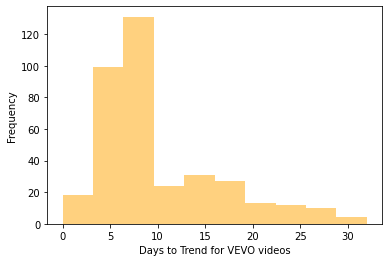

In [208]:
# I think that would look better with a graph

vevo.insert(5,'days_to_trend', vevo['trending_date'] - vevo['publish_date'])
ax1 = vevo['days_to_trend'].astype('timedelta64[D]').plot.hist(color='orange', alpha=0.5)
ax1.set_xlabel('Days to Trend for VEVO videos')

Text(0.5, 0, 'Days to Trend for other videos')

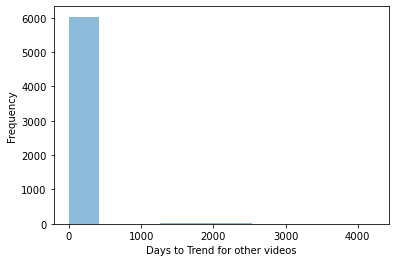

In [209]:
# So the vast majority of videos start "trending" between day 3 and day 10. Is that the case for non-VEVO videos?
nonVevo = df[~df['channel_title'].str.contains('VEVO')]
nonVevo.insert(5,'days_to_trend', nonVevo['trending_date'] - nonVevo['publish_date'])

ax2 = nonVevo['days_to_trend'].astype('timedelta64[D]').plot.hist(alpha=0.5)
ax2.set_xlabel('Days to Trend for other videos')

7 days 00:00:00


Text(0.5, 0, 'Days to Trend for other videos')

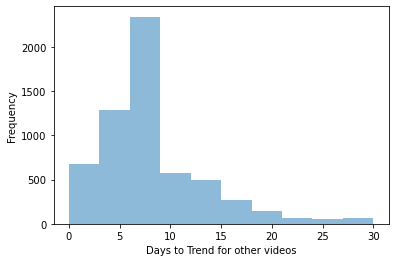

In [210]:
# That looks a bit skewed, let's look at videos between day 0 and day 100

nonVevo = nonVevo[nonVevo['days_to_trend'] <= pd.Timedelta(30, unit='D')]
print(nonVevo['days_to_trend'].median())
ax3 = nonVevo['days_to_trend'].astype('timedelta64[D]').plot.hist(alpha=0.5)
ax3.set_xlabel('Days to Trend for other videos')



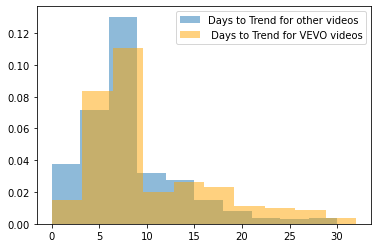

In [211]:
x = nonVevo['days_to_trend'].astype('timedelta64[D]')
y = vevo['days_to_trend'].astype('timedelta64[D]')
pyplot.hist(x, alpha=0.5, label='Days to Trend for other videos', density=True)
pyplot.hist(y, alpha=0.5, label=' Days to Trend for VEVO videos', color='orange', density=True)
pyplot.legend(loc='upper right')
pyplot.show()

In [212]:
# It seems that non-VEVO videos "trend" faster than VEVO videos, but VEVO videos have a second wind after 14 days of being posted. 
# It also seems that if non-VEVO videos don't trend in the first 15 days, it's very unlikely that they will ever trend. 
